In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score


In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.5 MB/s eta 0:00:00


In [3]:
from catboost import CatBoostRegressor, Pool, metrics, cv

In [5]:
data = pd.read_excel("dataset.xlsx")

In [6]:
data = data.drop(columns=["Unnamed: 4", "Дата", "NN", "Предсказание полином 2"])

In [7]:
# data = data[data["Удельный расход условного топлива на отпуск э/э гр.130"] < 550]

In [8]:
X = data.drop(columns="Удельный расход условного топлива на отпуск э/э гр.130")
y = data["Удельный расход условного топлива на отпуск э/э гр.130"]

In [9]:
X.isnull().sum()

Выработка электроэнергии ТА гр.130    0
Отпуск тепла из ТО ТА гр.130          0
dtype: int64

<Axes: >

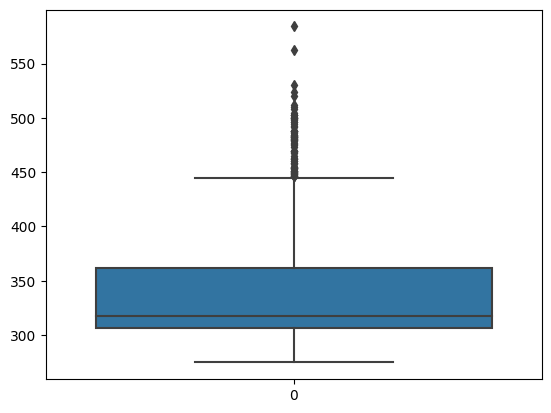

In [10]:
sns.boxplot(y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# **Линейная регрессия**

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
itog_pred = lin_reg.predict(X_test)

In [14]:
r2_score(y_test, itog_pred)

0.7407035000237303

# **CatBOOST**

In [15]:
cb_reg = CatBoostRegressor().fit(X_train, y_train, verbose=500)

Learning rate set to 0.040449
0:	learn: 52.3631128	total: 47ms	remaining: 47s
500:	learn: 12.7735390	total: 365ms	remaining: 364ms
999:	learn: 10.3427633	total: 660ms	remaining: 0us


In [16]:
cb_itog_pred = cb_reg.predict(X_test)

In [17]:
r2_score(y_test, cb_itog_pred)

0.888703218352646

CatBoost показал себя лучше, он показал себя хуже линейной регрессии, но после удаления столбца "Предсказание полином 2" линейная регрессия дала скор хуже, а CatBoost повысился.

Обучим CatBoost на всех данных и добаавим в него параметры

In [45]:
itog_model = CatBoostRegressor(iterations=5000,
                                    rsm=1,
                                    depth=7,
                                    grow_policy='Depthwise',
                                    task_type='GPU').fit(X, y, verbose=500)

Learning rate set to 0.014017
0:	learn: 54.1788725	total: 8.43ms	remaining: 50.6s
500:	learn: 10.5416771	total: 3.44s	remaining: 37.8s
1000:	learn: 8.8781099	total: 8.89s	remaining: 44.4s
1500:	learn: 7.9266012	total: 12.2s	remaining: 36.7s
2000:	learn: 7.3083817	total: 15.6s	remaining: 31.1s
2500:	learn: 6.8971830	total: 19.4s	remaining: 27.2s
3000:	learn: 6.6109830	total: 24.1s	remaining: 24.1s
3500:	learn: 6.4059897	total: 27.4s	remaining: 19.6s
4000:	learn: 6.2541649	total: 30.7s	remaining: 15.3s
4500:	learn: 6.1374336	total: 36.2s	remaining: 12.1s
5000:	learn: 6.0403315	total: 39.5s	remaining: 7.89s
5500:	learn: 5.9639137	total: 42.8s	remaining: 3.88s
5999:	learn: 5.9014329	total: 48s	remaining: 0us


In [46]:
ip = itog_model.predict(X)

In [47]:
r2_score(y, ip)

0.9883733044447944